In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 

# Step 1: Load and Explore the Data

## Load the dataset into a Pandas DataFrame.

In [5]:
df=pd.read_csv("D:\\ICT_DataScience\\Excel worksheet\\heart_disease.csv")
df
#print(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Perform exploratory data analysis (EDA):

### Check for missing values, data types, and summary statistics.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.shape

(1025, 14)

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Identify potential outliers in numerical columns.

In [20]:
# Splitting numerical columns
num_df=df.select_dtypes(include='number')  
num_cols=num_df.columns.tolist() 
print("Numerical columns are:",num_cols) 

Numerical columns are: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


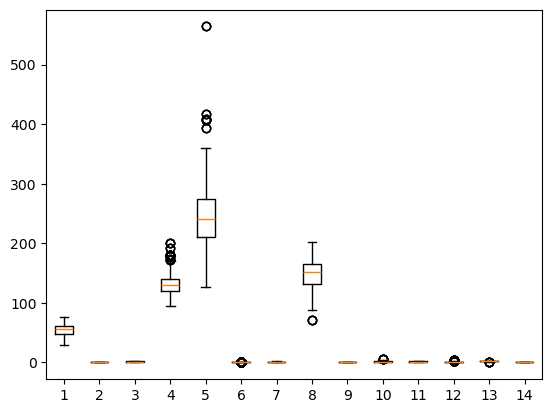

In [22]:
plt.boxplot(num_df) 
plt.show()

#### Resting blood pressure,Serum cholesterol,Fasting blood sugar,Maximum heart rate achieved,Oldpeak,Number of major vessels,Thalassemia these columns have the outliers

### Analyze the distribution of categorical variables.

#### This data set have some categorical columns sex,fasting blood sugar,resting electrocardiographic results,exercise iduced angina,thal,target.this categorical columns are already converted to numerical columns.so no need to analyze the distribution of categorical variables

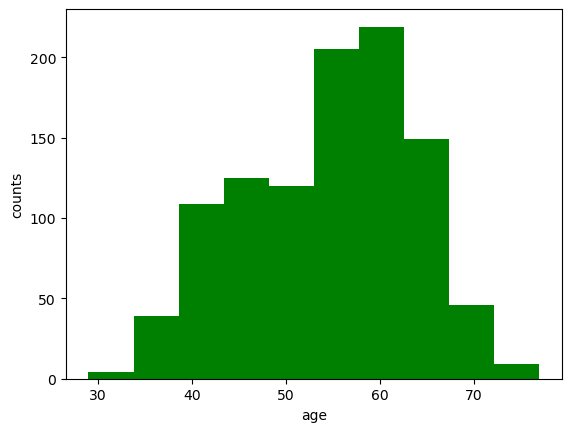

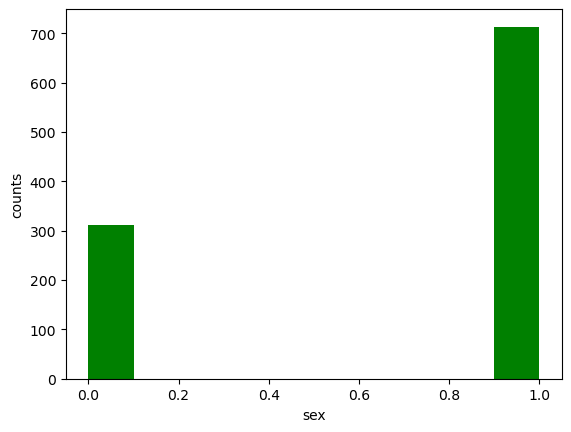

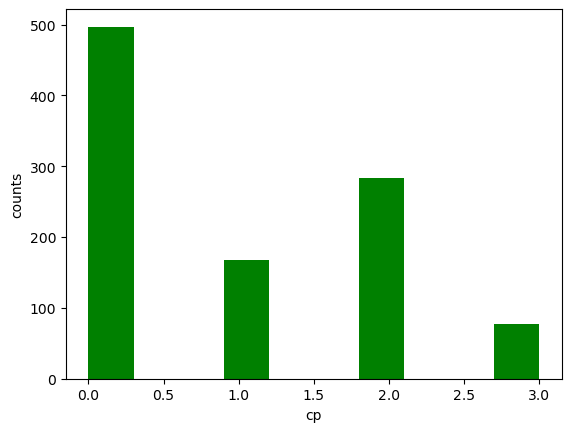

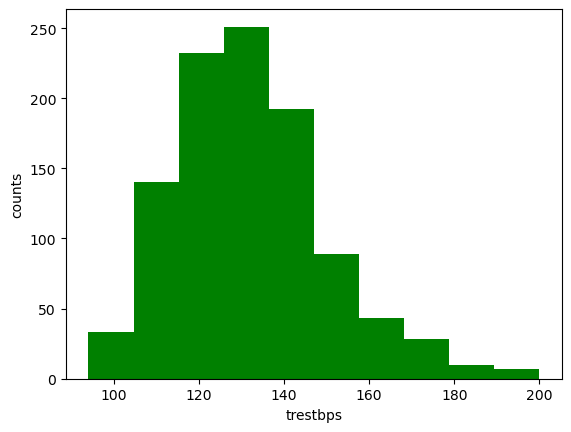

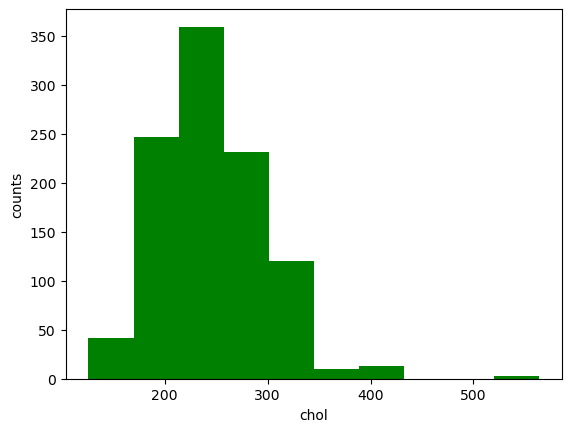

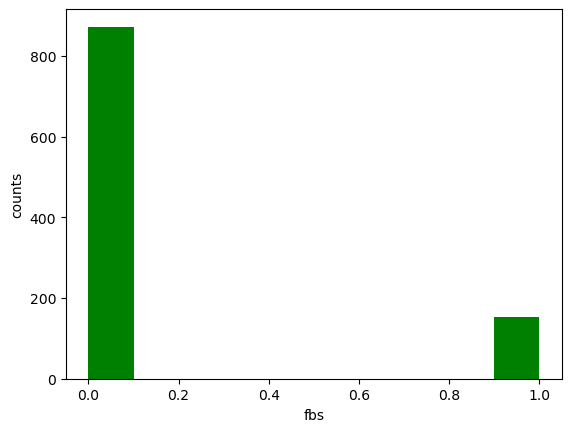

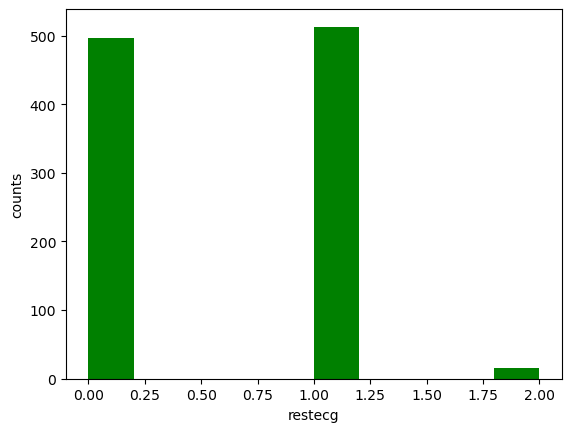

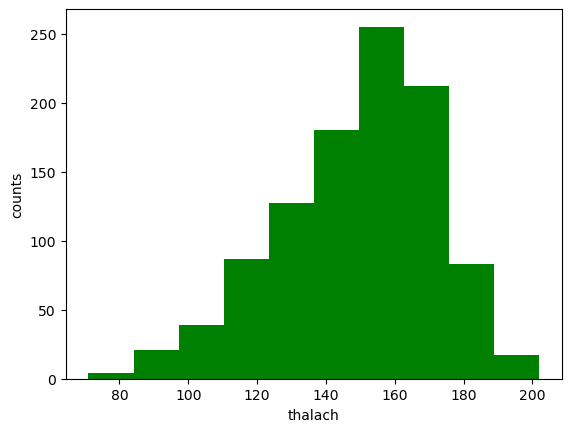

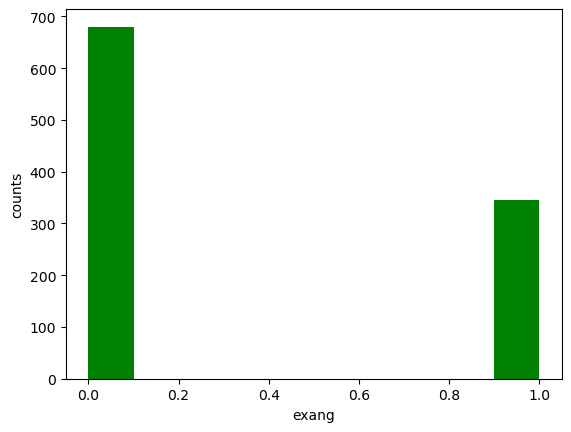

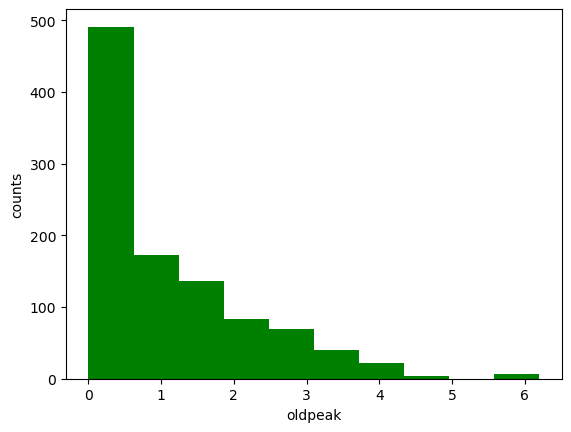

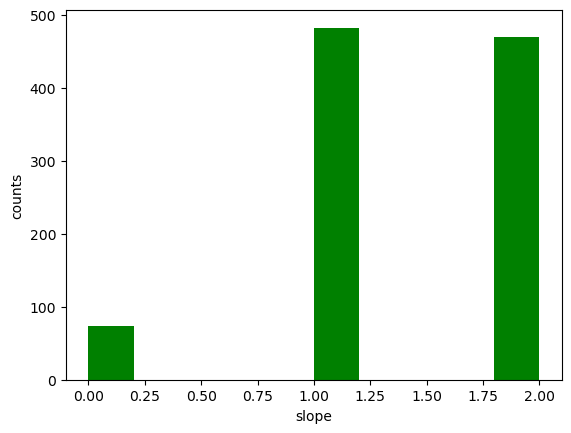

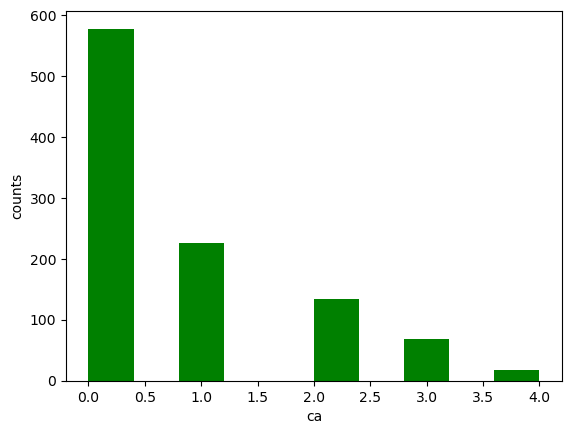

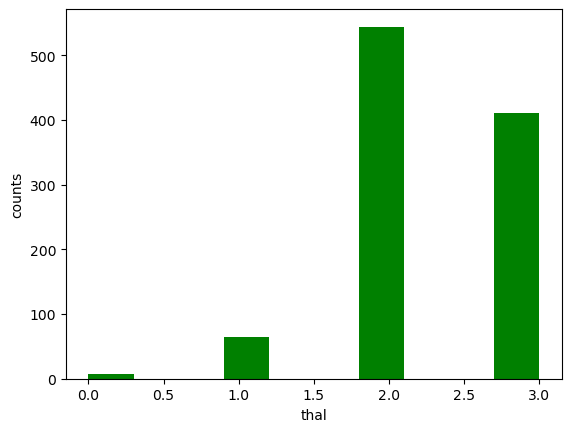

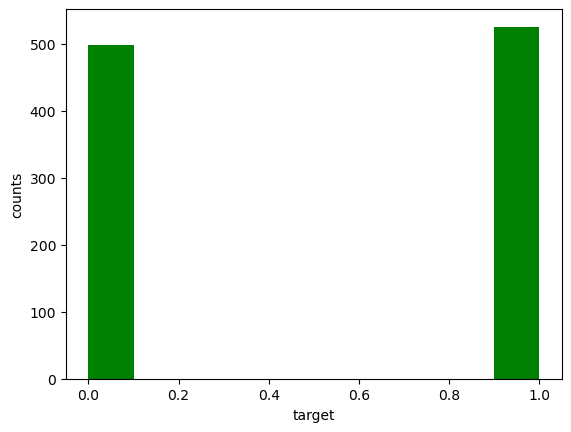

In [27]:
for col in num_cols :
    plt.hist(num_df[col],color='g')
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

### Correlation 

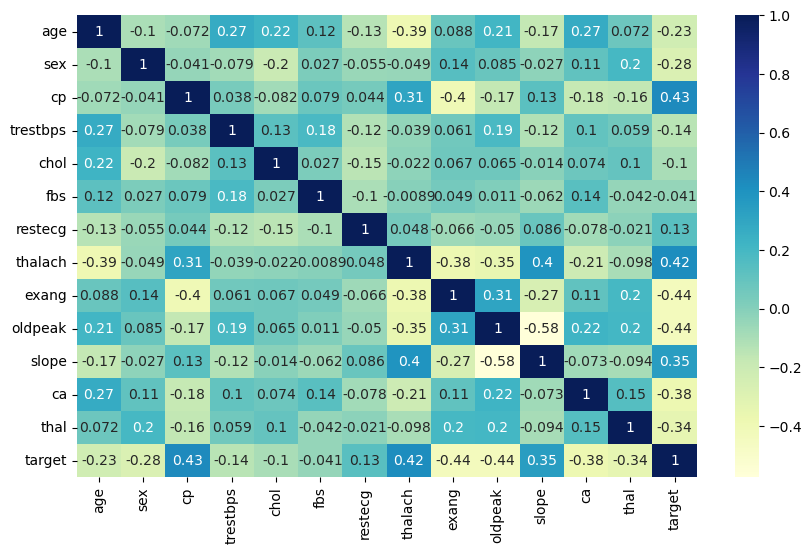

In [29]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True) 
plt.show()

# Step 2: Data Cleaning and Preprocessing

## Handle Missing Values (if needed):

In [32]:
for col in num_cols: 
    num_df[col]=num_df[col].fillna(num_df[col].mean()) 

In [33]:
num_df[col].mean()

0.5131707317073171

## Handle Outliers (if needed):

### Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers.

In [36]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25) 
    q3=df[column].quantile(0.75) 
    iqr=q3-q1 
    upper_bound=q3+1.5*iqr 
    lower_bound=q1-1.5*iqr 
    df[column]=df[column].clip(upper=upper_bound) 
    df[column]=df[column].clip(lower=lower_bound) 
    return df[column] 

In [38]:
for col in num_cols: 
    num_df[col]=remove_outliers(num_df,col)

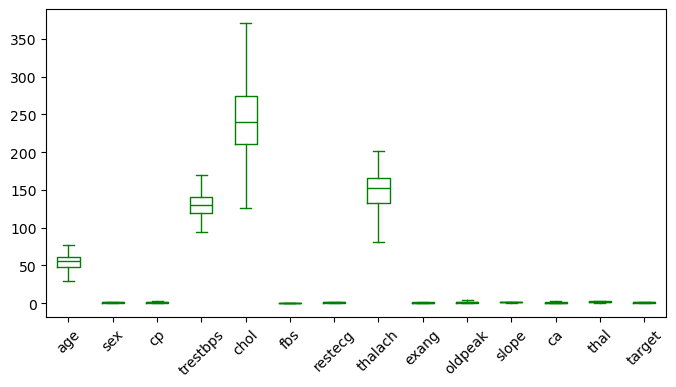

In [39]:
plt.figure(figsize=(8,4))
num_df.boxplot(color="g") 
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Encode Categorical Variables:

### Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).

In [48]:
One_hot_enc=pd.get_dummies(df,columns=['cp','restecg','thal'],dtype=int)
One_hot_enc

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0,...,1,0,0,0,1,0,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,1,...,0,0,0,1,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1.0,1,1,...,0,0,0,1,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,2,0,...,0,0,0,1,0,0,0,0,1,0


## Scale Numerical Features:

### Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

### Standard scaler method

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
std_scaler=StandardScaler() 
column=['trestbps','chol','thalach','oldpeak']
df[['trestbps_std','chol_std','thalach_std','oldpeak_std']]=std_scaler.fit_transform(df[column])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_std,chol_std,thalach_std,oldpeak_std
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.377636,-0.659332,0.821321,-0.060888
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.479107,-0.833861,0.255968,1.727137
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.764688,-1.396233,-1.048692,1.301417
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.936037,-0.833861,0.516900,-0.912329
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.364875,0.930822,-1.874977,0.705408


### MinMax scaler method

In [58]:
from sklearn.preprocessing import MinMaxScaler 

In [60]:
minmax_scaler=MinMaxScaler(feature_range=(0,1)) 
column=['trestbps','chol','thalach','oldpeak']
df[['trestbps_minmax','chol_minmax','thalach_minmax','oldpeak_minmax']]=minmax_scaler.fit_transform(df[column])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,trestbps_std,chol_std,thalach_std,oldpeak_std,trestbps_minmax,chol_minmax,thalach_minmax,oldpeak_minmax
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,-0.377636,-0.659332,0.821321,-0.060888,0.292453,0.196347,0.740458,0.161290
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,0.479107,-0.833861,0.255968,1.727137,0.433962,0.175799,0.641221,0.500000
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,0.764688,-1.396233,-1.048692,1.301417,0.481132,0.109589,0.412214,0.419355
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,0.936037,-0.833861,0.516900,-0.912329,0.509434,0.175799,0.687023,0.000000
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,0.364875,0.930822,-1.874977,0.705408,0.415094,0.383562,0.267176,0.306452


# Step 3: Train-Test Split

## Split the data into training and testing sets:
### For Regression: Predict serum cholesterol as the target variable.

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
# split label and features  
X=df.drop('chol',axis=1)
y=df['chol']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
X_train.shape

(820, 21)

In [111]:
X_test.shape

(205, 21)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [115]:
lin_reg=LinearRegression() 
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [117]:
mse=mean_squared_error(y_test,y_pred) 
r2=r2_score(y_test,y_pred)
print("mean squared error:",mse) 
print("r2 score:",r2)

mean squared error: 0.14759448520056784
r2 score: 0.409608010607856


## For Classification: Predict target (presence of heart disease) as the target variable.

In [120]:
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [122]:
X=df.drop('target',axis=1) #feature
y=df['target']             # label

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [128]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.7951219512195122
precision: 0.807461473815195
recall: 0.7951219512195122
f1_score: 0.7964571733123886


## K-Nearest Neighbors (KNN)

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [135]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.7317073170731707
precision: 0.7317676774711779
recall: 0.7317073170731707
f1_score: 0.7317200865304863


## Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

In [140]:
nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)
y_pred_NB = nb_classifier.predict(X_test)

In [142]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.7317073170731707
precision: 0.7317676774711779
recall: 0.7317073170731707
f1_score: 0.7317200865304863
